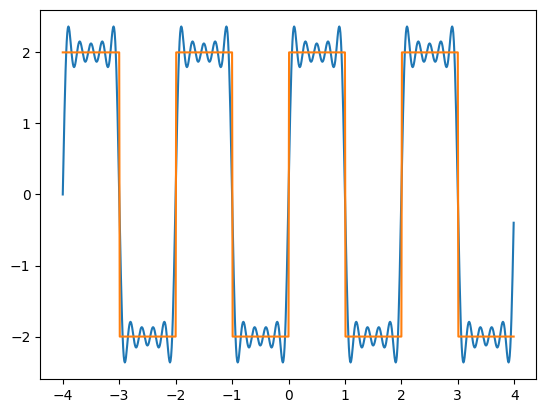

In [3]:
import matplotlib.pyplot as plt 
from scipy.integrate import quad
import numpy as np
import math

T = 2
A = 10
func = lambda t: 2 if t % T < T/2 else -2
f = lambda t, xt, n: xt(t) * np.cos(n*(2*np.pi/T)*t)
g = lambda t, xt, n: xt(t) * np.sin(n*(2*np.pi/T)*t)
a0 = lambda xt: (2/T)*quad(xt, 0, T)[0]
an = lambda xt, n: (2/T)*quad(f, 0, T, args=(xt, n))[0]
bn = lambda xt, n: (2/T)*quad(g, 0, T, args=(xt, n))[0]

def Fourier(t, xt, N):
    res = np.sum([ an(xt, n)*np.cos(n*t*(2*np.pi/T)) + bn(xt, n)*np.sin(n*t*(2*np.pi/T)) for n in range(1, N+1)])
    return a0(xt)/2 + res

#func = lambda x: A * math.cos(2*np.pi*100*x)
x = np.arange(-4, 4, 0.01)
y = np.array([ Fourier(i, func, 10) for i in x])
plt.plot(x, y)
z = np.array([ func(i) for i in x])
plt.plot(x, z)
plt.show()

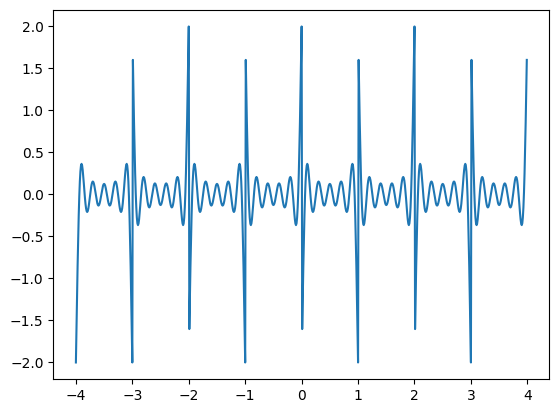

In [4]:
# Ошибка
y = np.array([Fourier(i, func, 10) - func(i) for i in x])
plt.plot(x, y)
plt.show()

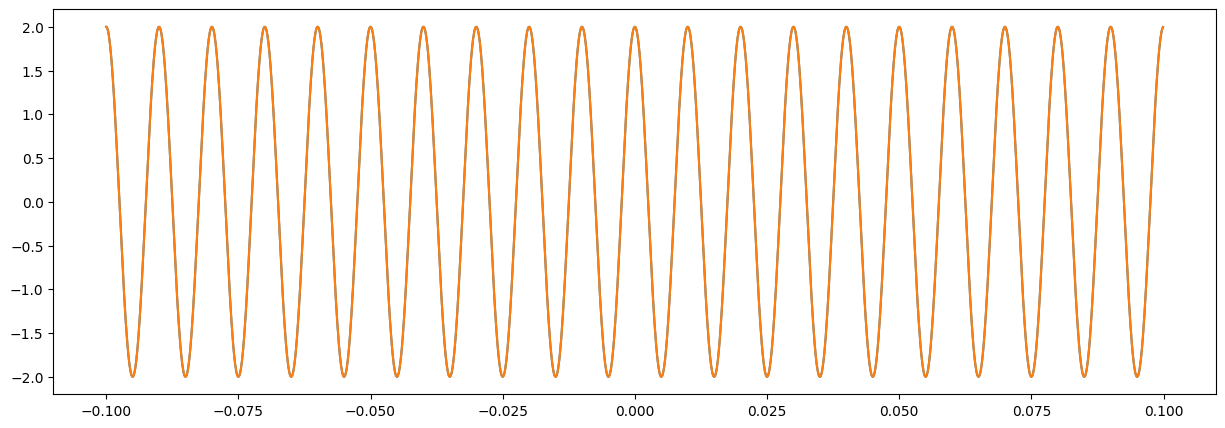

In [5]:
# Встроенная функция cos() и её разложение в ряд Фурье
T = 1/100
A = 2
func = lambda x: A * np.cos(2*np.pi*100*x)
x = np.arange(-0.1, 0.1, 0.0001)
y = np.array([func(i) for i in x])
z = np.array([Fourier(i, func, 10) for i in x])
plt.figure(figsize=(15, 5))
plt.plot(x, y)
plt.plot(x, z)
plt.show()

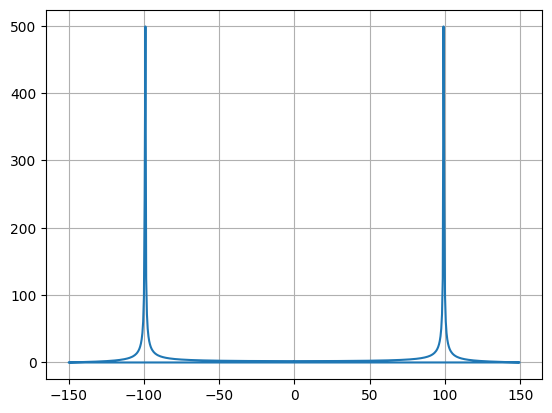

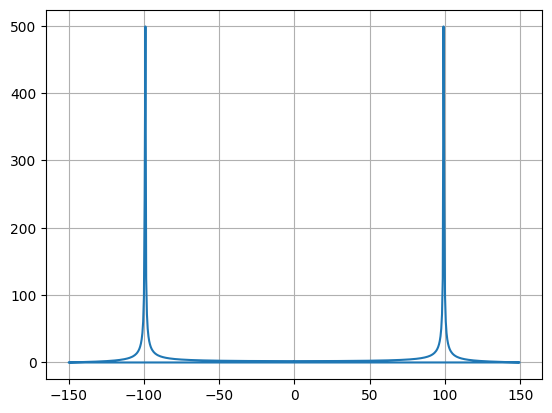

In [6]:
from scipy.fft import fft, fftfreq
# Спектр встроенной функции cos() и её разложения в ряд Фурье
# Number of sample points
T = 1/100
A = 2
N = 600
# sample spacing
S = 1.0 / 300.0
func = lambda x: A * np.cos(2*np.pi*100*x)
x = np.linspace(-5, 5, N)
y = np.array([func(i) for i in x])
yf = fft(y)
xf = fftfreq(N, S)
plt.plot(xf, np.abs(yf))
plt.grid()
plt.show()
y = np.array([Fourier(i, func, 10) for i in x])
yf = fft(y)
xf = fftfreq(N, S)
plt.plot(xf, np.abs(yf))
plt.grid()
plt.show()

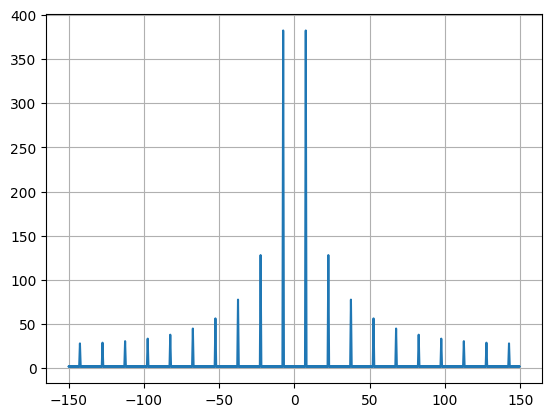

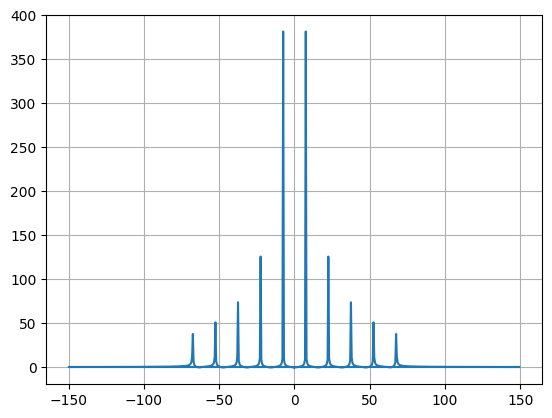

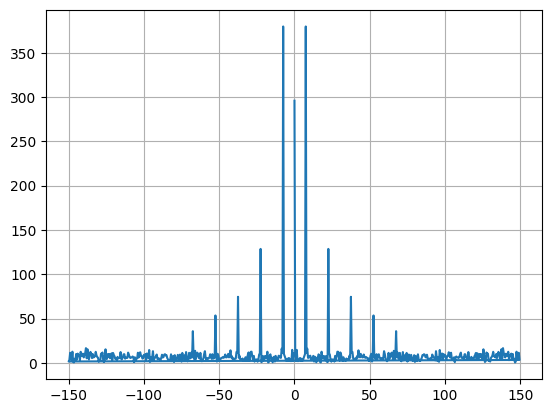

In [8]:
from scipy.fft import fft, fftfreq
import numpy as np
T = 2
func = lambda t: 1 if t % T < T/2 else -1
# Спектр прямоугольного сигнала (обычной функции)
x = np.linspace(-15, 15, N)
y = np.array([func(i) for i in x])
yf = fft(y)
xf = fftfreq(N, S)
plt.plot(xf, np.abs(yf))
plt.grid()
plt.show()
# Спектр прямоугольного сигнала (ряд Фурье)
y = np.array([Fourier(i, func, 10) for i in x])
yf = fft(y)
xf = fftfreq(N, S)
plt.plot(xf, np.abs(yf))
plt.grid()
plt.show()
# Спектр прямоугольного сигнала с шумом
# Спектр практически не изменился (близкие к нулю амплитуды ненужных частот)
y = np.array([Fourier(i, func, 10) + np.random.random() for i in x])
yf = fft(y)
xf = fftfreq(N, S)
plt.plot(xf, np.abs(yf))
plt.grid()
plt.show()
